In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb


In [2]:
path = 'data/test.csv'
path2 = "data/train.csv"

train = pd.read_csv(path2)

test = pd.read_csv(path)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Bismillah
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as II
from sklearn.preprocessing import OneHotEncoder as OHE, StandardScaler
from xgboost import XGBClassifier as XGBC

# Data
training = train.copy()
training.info()
testing = test.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Feature Engineering
* Explore data
* Mutual Infromation
* Making new features
* Clustering
* PCA(Unsupervised Machine Learning)
* Target Encoding(supervised Machine Learning)

In [5]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif as mic

df = train.copy()

te = test.copy()

df.drop('PassengerId', inplace=True, axis=1)
te.drop('PassengerId', inplace=True, axis=1)

feature_num = df.shape[1]

df.describe(include='all')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


* PassengerId: Ignore
* survived: we have to treat it as if  it were categorical.
* Plcass: same as "survived"
* Name: Let's see what we can get from the title
* Sex: Male or Female
* Age: age of individual
* SibSP: Siblings or spouse
* Parch: Parent or child
* Ticket: The ticket number
* Fare: Amount paid
* cabin: The cabin number
* embarked: Where the passenger embarked from

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
import re
from sklearn.pipeline import Pipeline as Pipe


# Name Title
# using regex
compiler = re.compile(r"[a-zA-Z]+\.")

# Regular expression to find titles (e.g., Rev., Dr., etc.)
data = df.Name.apply(lambda x: str(compiler.findall(x)[0]))

data2 = te.Name.apply(lambda x: str(compiler.findall(x)[0]))
data2.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Col.', 'Rev.', 'Dr.',
       'Dona.'], dtype=object)

In [10]:
df['Name'] = data
te['Name'] = data2
df.Name.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name, dtype: int64

In [11]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Create a bar chart
data = go.Bar(
            x=df.Name.unique(),
            y=df['Name'].value_counts()
)

# Create a layout, if you want to customize the chart
layout = go.Layout(
    title='Titles of passengers',
    xaxis=dict(title='Titles'),
    yaxis=dict(title='Frequency'),
)

# Create a figure with the data and layout
fig = go.Figure(data=data, layout=layout)

# Plot the figure
# pyo.plot(fig, filename='bar_chart.html', auto_open=False)
iplot(fig)

In [12]:
# Make a new column "Family" then work on tickets
df['Family'] = df.Parch + df.SibSp + 1

te['Family'] = te.Parch + te.SibSp + 1

tickets = df.Ticket.apply(lambda x: "".join(re.findall(r'^[a-zA-z]', str(x))) )

tickets.replace({'': "N"}, inplace=True)

tickets2 = te.Ticket.apply(lambda x: "".join(re.findall(r'^[a-zA-z]', str(x))) )

tickets2.replace({'': "N"}, inplace=True)

df['Ticket'] = tickets
tickets2

0      N
1      N
2      N
3      N
4      N
      ..
413    A
414    P
415    S
416    N
417    N
Name: Ticket, Length: 418, dtype: object

In [129]:
# Finally the Cabin feature

# Getting the first letter
cabin = df.Cabin.apply(lambda x: str(x)[0])

cabin2 = te.Cabin.apply(lambda x: str(x)[0])



df['Cabin'] = cabin

te['Cabin'] = cabin2

# let's see the relationship between cabin and the class
som = df.groupby(['Cabin', "Pclass"]).Name.count().reset_index()

som2 = te.groupby(['Cabin', "Pclass"]).Name.count().reset_index()

pvtable = som.pivot_table(values='Name', columns="Pclass", index='Cabin').fillna(0)

pvtable_te = som2.pivot_table(values='Name', columns="Pclass", index='Cabin').fillna(0)

# Get the percentage of people in each class for each cabin
# training data
trclass1 = [pvtable.loc[a, 1]* 100 / (pvtable.loc[a, :].sum()) for a in pvtable.index]
trclass2 = [pvtable.loc[a, 2]* 100 / (pvtable.loc[a, :].sum()) for a in pvtable.index]
trclass3 = [pvtable.loc[a, 3]* 100 / (pvtable.loc[a, :].sum()) for a in pvtable.index]

# testing data
teclass1 = [pvtable_te.loc[a, 1]* 100 / (pvtable_te.loc[a, :].sum()) for a in pvtable_te.index]
teclass2 = [pvtable_te.loc[a, 2]* 100 / (pvtable_te.loc[a, :].sum()) for a in pvtable_te.index]
teclass3 = [pvtable_te.loc[a, 3]* 100 / (pvtable_te.loc[a, :].sum()) for a in pvtable_te.index]

np.array(trclass2) + np.array(trclass3)

array([  0.        ,   0.        ,   0.        ,  12.12121212,
        21.875     , 100.        , 100.        ,   0.        ,
        94.1775837 ])

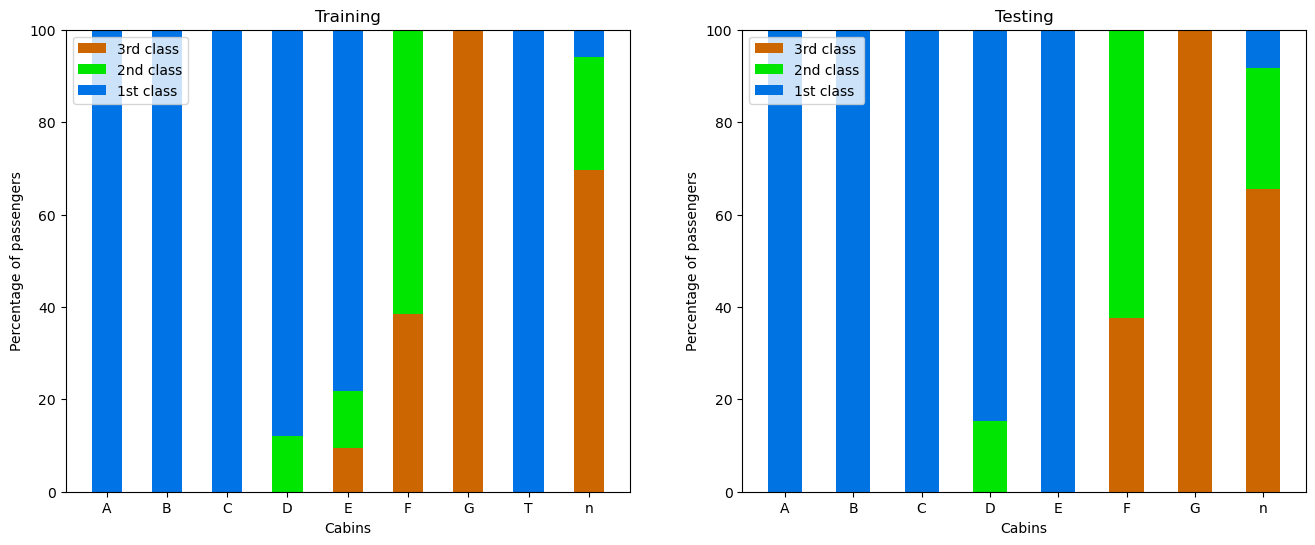

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# training data
# let's start with the 3rd class
axes[0].bar(pvtable.index, trclass3, width=0.5, color='#cc6600', label='3rd class')
axes[0].bar(pvtable.index, trclass2, width=0.5, color='#00e600', bottom=trclass3, label='2nd class')
axes[0].bar(pvtable.index, trclass1, width=0.5, color='#0073e6', bottom=np.array(trclass3) + np.array(trclass2), label='1st class')

axes[0].set_title('Training')
axes[0].set_xlabel("Cabins")
axes[0].set_ylabel("Percentage of passengers")


# testing data
axes[1].bar(pvtable_te.index, teclass3, width=0.5, color='#cc6601', label='3rd class')
axes[1].bar(pvtable_te.index, teclass2, width=0.5, color='#00e602', bottom=teclass3, label='2nd class')
axes[1].bar(pvtable_te.index, teclass1, width=0.5, color='#0073e3', bottom=np.array(teclass3) + np.array(teclass2), label='1st class')

axes[1].set_title('Testing')
axes[1].set_xlabel("Cabins")
axes[1].set_ylabel("Percentage of passengers")


axes[1].legend()
axes[0].legend()
plt.show()

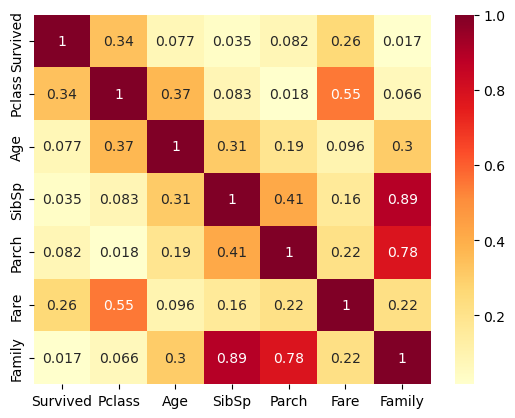

In [14]:
from scipy.stats import pearsonr


sb.heatmap(df.corr().abs(), cmap='YlOrRd', annot=True)
plt.show()


In [15]:
data = df.corr().abs().unstack().sort_values(ascending=False).reset_index()
data[data.level_0 == 'Age']

,level_0,level_1,0
4,Age,Age,1.000000
16,Age,Pclass,0.369226
20,Age,SibSp,0.308247
22,Age,Family,0.301914
29,Age,Parch,0.189119
34,Age,Fare,0.096067
39,Age,Survived,0.077221


Looks like the hightest correlated feature with age after the age feature itself is "Pclass"

In [99]:
df['Age'] = df.groupby(['Sex', "Pclass"])['Age'].apply(lambda x: x.fillna(x.median()))
df.Age.isna().any()

False

In [100]:
df.Embarked.isna().any()

True

For Embarked when a research was done it was discovered that Mrs George was Miss Amelie's maid and they both embarked from Southampton the "S" in the Embarked feature

In [106]:
missing = df[df.Embarked.isna()]
train.iloc[missing.index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [110]:
df['Embarked'] = df.Embarked.fillna("S")
df.Embarked.isna().any()
# done with "Embarked" and "Age" feature

False

### Let's now compare the values and visualize

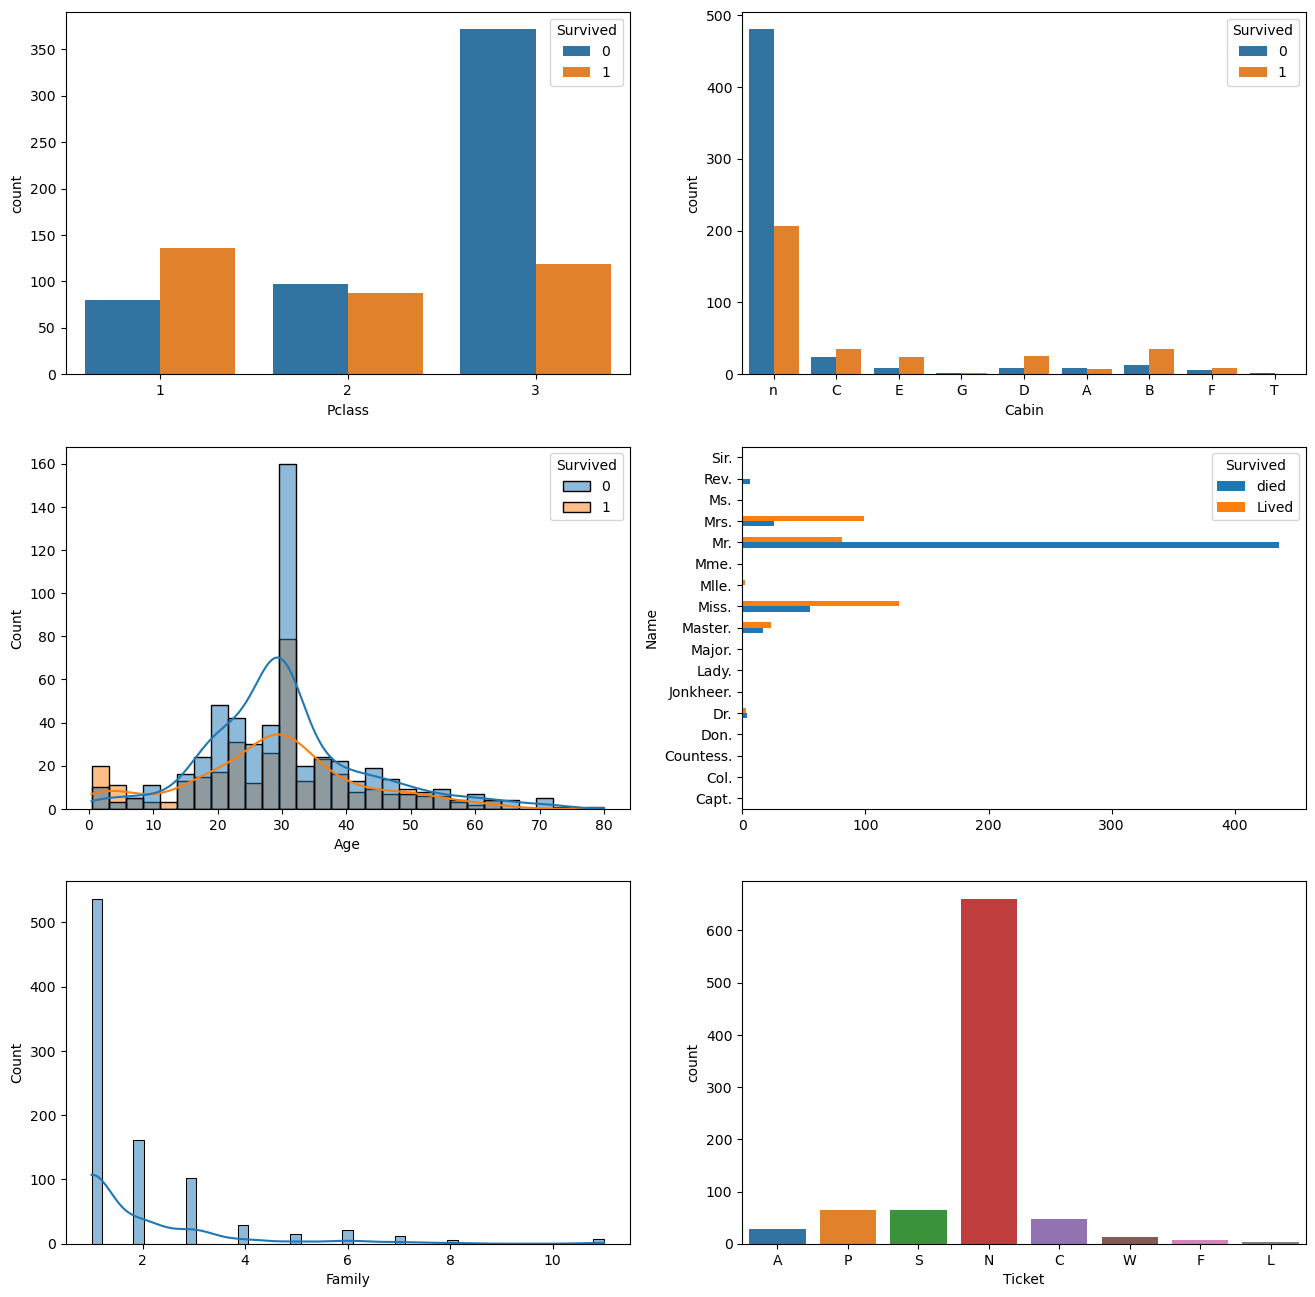

In [15]:
# Subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

# pclass
sb.countplot(data=df, x="Pclass", hue='Survived', ax=axes[0, 0])

# cabin col
# df.Cabin.value_counts().sort_values(ascending=False).plot(kind='bar', ax=axes[0, 1])
sb.countplot(data=df, x="Cabin", hue='Survived', ax=axes[0, 1])


# A histplot of age
sb.histplot(data=df, x="Age", ax=axes[1, 0], kde=True, hue="Survived")

# Title: number of people that survived with respect to title 
title_sur = df.pivot_table(index='Name', columns='Survived', aggfunc='size', fill_value=0)

title_sur = title_sur.rename(columns={0: "died", 1:"Lived"})

title_sur.plot(kind='barh', ax=axes[1, 1])

# a boxplot of Family 
sb.histplot(x=df.Family, ax=axes[2, 0], kde=True)

# The ticket plot
sb.countplot(x=df.Ticket, ax=axes[2, 1])

plt.show()

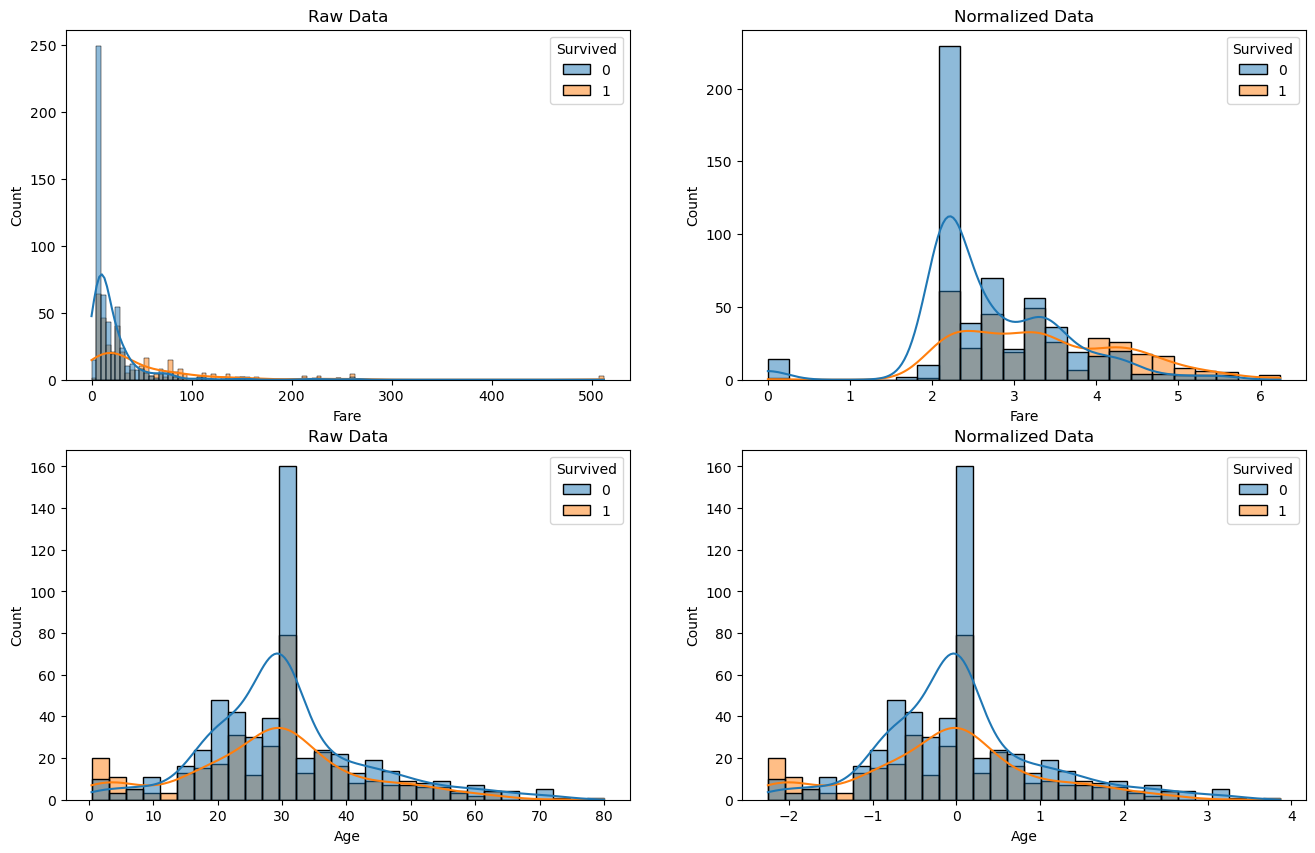

In [16]:
# let's find out more on this data
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
# Fare
sb.histplot(data=df, x='Fare', hue='Survived', kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Raw Data')

stand = df.Fare.apply(lambda x: (x-df.Fare.mean())/df.Fare.std() )

sb.histplot(data=df, x=df.Fare.apply(np.log1p), hue='Survived', kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Normalized Data')

# Age
sb.histplot(data=df, x='Age', hue='Survived', kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Raw Data')

stand = df.Age.apply(lambda x: (x-df.Age.mean())/df.Age.std() )

sb.histplot(data=df, x=stand, hue='Survived', kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Normalized Data')


plt.show()

* Now let's encode and pass it to an algorithm to see the level of accuracy we'll achieve

In [17]:
from sklearn.preprocessing import OneHotEncoder as OH, OrdinalEncoder as OE, StandardScaler as SS
from sklearn.compose import ColumnTransformer as CT
from sklearn.pipeline import Pipeline as Pipe
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, mean_absolute_error as mae



# split the dataset into features and target
x = df.drop(columns=['Survived'])
y = df.Survived

# let's normalize fare
x['Fare'] = x.Fare.apply(np.log1p)

# split further into train and validation data
x_train, x_test, y_train, y_test = tts(x, y, test_size=.2)


# one hot encoder
oneHot = OH(handle_unknown='ignore', sparse=False)

# select low cardinality dtypes
one_hot = [a for a in x.select_dtypes(include='object') if x[a].nunique()<= 5]

# ordinal encoder
ordinal = OE(handle_unknown='error')

# select high cardinality dtypes
ord_features = [a for a in x.select_dtypes(include='object') if x[a].nunique() > 5 ] 

# Fare columns needs to be standardized
scaler = SS()

# columns to be transformed
columns = CT(transformers=[
    ('OneHotEncoder', oneHot, one_hot),
    ('OrdinalEncoder', ordinal, ord_features),
    ("Scaler", scaler, ['Fare'])
])

# Pipline
pipe_model = Pipe(steps=[
    ('Column Transformation', columns),
    ('Model', DTC(max_leaf_nodes=50))
])
pipe_model

Pipeline(steps=[('Column Transformation',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Sex', 'Embarked']),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(),
                                                  ['Name', 'Ticket', 'Cabin']),
                                                 ('Scaler', StandardScaler(),
                                                  ['Fare'])])),
                ('Model', DecisionTreeClassifier(max_leaf_nodes=50))])

In [18]:
# no missing values
y = pd.DataFrame(y)


# let's make a function to ease our lives
def run_model(model, Xtrain=x, ytrain=y, Xtest=x_test, ytest=y_test):
    # fit data into the model
    model.fit(Xtrain, ytrain)
    # make prediction
    prediction = model.predict(Xtest)
    # score dataset
    acc_score = accuracy_score(ytest, prediction)
    mean_abs = mae(ytest, prediction)
    return [acc_score, mean_abs]


x_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
584,3,Mr.,male,29.7,0,0,N,2.273414,n,C,1
434,1,Mr.,male,50.0,1,0,N,4.041295,E,S,2
738,3,Mr.,male,29.7,0,0,N,2.185579,n,S,1
282,3,Mr.,male,16.0,0,0,N,2.351375,n,S,1
681,1,Mr.,male,27.0,0,0,P,4.353231,D,C,1


In [19]:
accuracy, mean_error = run_model(pipe_model)
accuracy

0.8379888268156425

In [20]:
te['Fare'] = te.Fare.fillna(te.Fare.mean())
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
 10  Family    418 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [21]:
# Using a pipline
# columns to be transformed
columns = CT(transformers=[
    ('OneHotEncoder', oneHot, one_hot),
    ("Scaler", scaler, ['Fare'])
])

# Pipline
pipe_model = Pipe(steps=[
    ('Column Transformation', columns),
    ('Model', XGBC())
])

values, _ = pd.factorize(te.Name)
te['Name'] = values

values, _ = pd.factorize(df.Name)
df['Name'] = values

df['Fare'] = df.Fare.apply(np.log1p)
te['Fare'] = te.Fare.apply(np.log1p)

x = df.drop('Survived', axis=1)
y = df.Survived.reset_index().drop('index', axis=1)

pipe_model.fit(x, y)
preds = pipe_model.predict(te)

In [22]:
answers = pd.DataFrame(data={'PassengerId': test.PassengerId,
                             "Survived": preds})

# answers.to_csv('submit.csv', index=False)
# accuracy is 0.77033 Not enough!

That's a pretty good score but we want nothing less than a 96% accuracy so we'll work on the data more

(-0.6610217748408027, 5.305465608334359e-113)


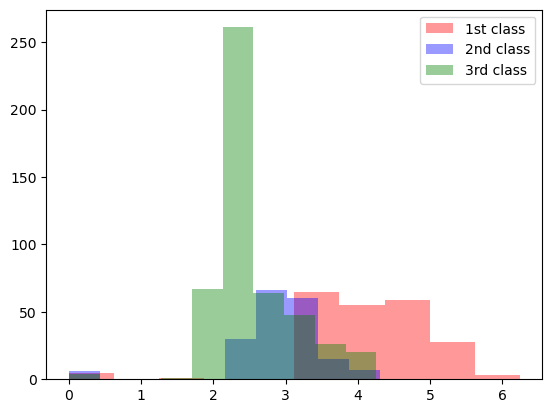

In [26]:
from scipy.stats import pearsonr

np.cov(df.Pclass, df.Fare)

print(pearsonr(df.Pclass, df.Fare))

plt.hist(x=df.Fare[df.Pclass==1], alpha=.4, color='r', label='1st class')
plt.hist(x=df.Fare[df.Pclass==2], alpha=.4, color='blue', label='2nd class')
plt.hist(x=df.Fare[df.Pclass==3], alpha=.4, color='green', label='3rd class')

plt.legend()
plt.show()

In [24]:
df['MeanFare'] = train.groupby('Pclass').Fare.transform('mean')
df.MeanFare.apply(np.log1p)


0      2.686183
1      4.444469
2      2.686183
3      4.444469
4      2.686183
         ...   
886    3.075568
887    4.444469
888    2.686183
889    4.444469
890    2.686183
Name: MeanFare, Length: 891, dtype: float64

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




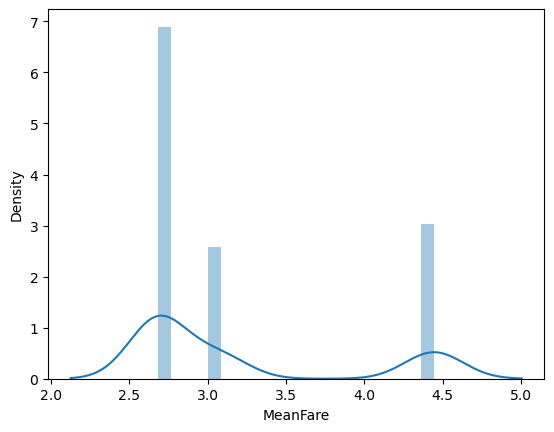

In [32]:
sb.distplot(df.MeanFare.apply(np.log1p))
plt.show()